<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/01_svd_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SVD:Image Compression

We demonstrate the idea of matrix approximation with a simple example: image compression.

The large data sets often contain underlying patterns that facilitate low-rank representations. Natural images present a simple and intuitive
example of this inherent compressibility.

A grayscale image may be thought of as a  real-valued matrix $X \in R^{n\times m}$, where $n$ and $m$ are the number of pixels in the vertical and
horizontal directions, respectively. 

Depending on the basis of representation (pixel-space,
Fourier frequency domain, SVD transform coordinates), images may have very compact approximations. 

<img src='https://github.com/rahiakela/data-science-research-and-practice/blob/main/data-driven-science-and-engineering/01-svd/images/svd1.png?raw=1' width='400'/>

##Setup

In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16, 8]

In [ ]:
!wget https://github.com/rahiakela/data-science-research-and-practice/raw/main/data-driven-science-and-engineering/01-svd/images/dog.jpg

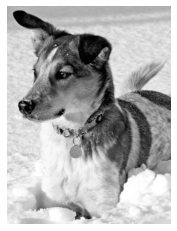

In [9]:
# loading image
img = imread("dog.jpg")
# Convert RGB to grayscale
X = np.mean(img, -1)

# plot the image
img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

##Image Compression

It is possible to take the SVD of this image and plot the diagonal singular values.

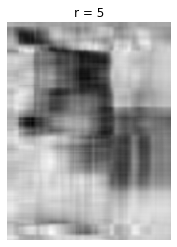

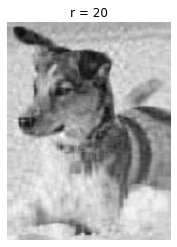

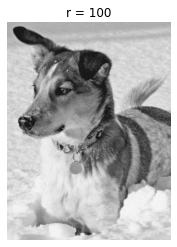

In [10]:
# take the SVD of this image and plot the diagonal singular values
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# compute the approximate matrix using the truncated SVD for various ranks (r = 5, 20, and 100)
j = 0
for r in (5, 20, 100):
  # Construct approximate image
  x_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]

  # Now, let's see the approximate matrix $\tilde X$ for various truncation values $r$.
  plt.figure(j + 1)
  j += 1
  img = plt.imshow(x_approx)
  img.set_cmap("gray")
  plt.axis("off")
  plt.title(f"r = {str(r)}")
  plt.show()

By `r = 100`, the reconstructed image is quite accurate, and the singular values account for almost `80%` of the image variance.

Finally, we plot the singular values and cumulative energy.

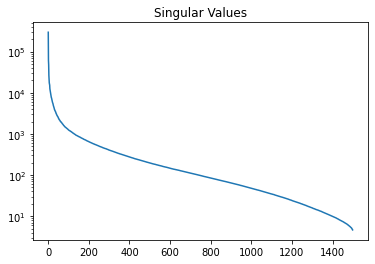

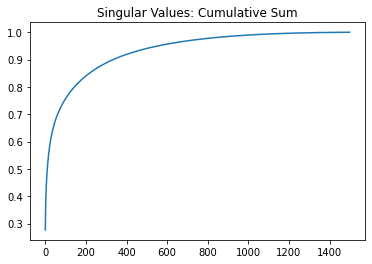

In [11]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

The SVD truncation results in a compression of the original image, since only the first 100 columns of $U$ and $V$, along with the first 100
diagonal elements of $S$, must be stored in $\tilde U, \tilde S$ and $\tilde V$.

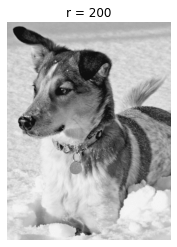

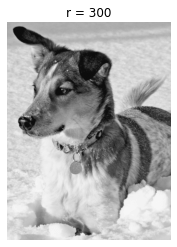

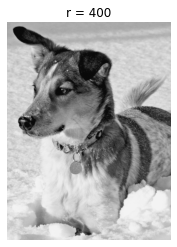

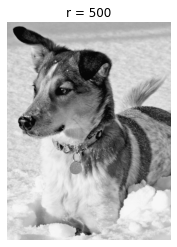

In [12]:
# take the SVD of this image and plot the diagonal singular values
U, S, VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

# compute the approximate matrix using the truncated SVD for various ranks (r = 5, 20, and 100)
j = 0
for r in (200, 300, 400, 500):
  # Construct approximate image
  x_approx = U[:, :r] @ S[0:r, :r] @ VT[:r, :]

  # Now, let's see the approximate matrix $\tilde X$ for various truncation values $r$.
  plt.figure(j + 1)
  j += 1
  img = plt.imshow(x_approx)
  img.set_cmap("gray")
  plt.axis("off")
  plt.title(f"r = {str(r)}")
  plt.show()